# 1.Custom yaml 파일 만들기
- 필요시 설치 : !pip install PyYAML

In [ ]:
import yaml

data={
        "train":'/content/drive/MyDrive/Colab Notebooks/images/03_Dips/train',
        "val":'/content/drive/MyDrive/Colab Notebooks/images/03_Dips/vaild',
        "test":'/content/drive/MyDrive/Colab Notebooks/images/03_Dips/test',    # optional(생략가능)
        "names":['참외', '토마토', '사과'],
        "nc" : 3 }

with open('/content/fruit_data.yaml', 'w') as f :
    yaml.dump(data, f)

with open('/content/fruit_data.yaml', 'r') as f :
    fruit_yaml=yaml.safe_load(f)
    display(fruit_yaml)

{'names': ['참외', '토마토', '사과'],
 'nc': 3,
 'test': '/content/drive/MyDrive/Colab Notebooks/images/03_Dips/test',
 'train': '/content/drive/MyDrive/Colab Notebooks/images/03_Dips/train',
 'val': '/content/drive/MyDrive/Colab Notebooks/images/03_Dips/vaild'}

# 3.YOLOv8을 사용하기 위한 SetUP

In [ ]:
# 설치
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.5/983.5 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import ultralytics
from ultralytics import YOLO
import cv2

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# ultralytics에서 YOLO 모듈을 불러옴
from ultralytics import YOLO

# yolov8n.pt 모델의 아키텍처와 가중치을 함께 불러옴
model=YOLO('yolov8n.pt')

# 모델이 분류할 수 있는 부류의 수 확인
print(type(model.names), len(model.names))

# 모델이 분류할 수 있는 부류 확인
print(model.names)

100%|██████████| 6.25M/6.25M [00:00<00:00, 55.3MB/s]


<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

# 4.모델 아키텍처를 이용하여 Custom Dataset으로 학습
- 이미지 사이즈 : 오마 >> 속성 >> 자세히 보기 >> 1440 * 1080

In [ ]:
model.train(data='/content/fruit_data.yaml', epochs=30, batch=16, imgsz=640)  # 학습시 640×640

Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/fruit_data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None,

100%|██████████| 22.2M/22.2M [00:00<00:00, 147MB/s] 

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     


  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256,

train: Scanning /content/drive/MyDrive/Colab Notebooks/images/03_Dips/train/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.6±0.1 ms, read: 1.7±0.4 MB/s, size: 312.2 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/images/03_Dips/vaild/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:583: UserWarning: Glyph 52280 (\N{HANGUL SYLLABLE CAM}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:583: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:583: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:583: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:583: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/ut

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      1.096      3.397      1.191        202        640:  50%|█████     | 1/2 [00:24<00:24, 24.28s/it]


100%|██████████| 755k/755k [00:00<00:00, 14.8MB/s]
       1/30         0G      1.063      3.409      1.165         48        640: 100%|██████████| 2/2 [00:28<00:00, 14.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:11<00:00, 11.58s/it]

                   all         20        111    0.00901      0.537      0.127      0.096



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G      1.053      3.282      1.178         37        640: 100%|██████████| 2/2 [00:21<00:00, 10.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.89s/it]

                   all         20        111    0.00983      0.575      0.178      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G      1.021      3.176      1.154         50        640: 100%|██████████| 2/2 [00:19<00:00,  9.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.53s/it]

                   all         20        111     0.0112      0.642      0.254      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G      0.998      3.007      1.083         57        640: 100%|██████████| 2/2 [00:18<00:00,  9.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.17s/it]

                   all         20        111     0.0135      0.761      0.309      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G      1.055      2.841      1.055         64        640: 100%|██████████| 2/2 [00:19<00:00,  9.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.03s/it]

                   all         20        111     0.0151      0.844      0.361      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G       1.12      2.591      1.119         52        640: 100%|██████████| 2/2 [00:20<00:00, 10.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.91s/it]

                   all         20        111     0.0165      0.901      0.389       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G     0.9221      2.153      1.052         27        640: 100%|██████████| 2/2 [00:18<00:00,  9.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.14s/it]

                   all         20        111     0.0181      0.984      0.411      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G      1.029      2.049       1.08         66        640: 100%|██████████| 2/2 [00:18<00:00,  9.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.24s/it]

                   all         20        111     0.0182      0.984      0.434      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G     0.9871      1.829      1.048         55        640: 100%|██████████| 2/2 [00:18<00:00,  9.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.79s/it]

                   all         20        111     0.0182      0.984      0.459      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G     0.8749      1.758      1.017         25        640: 100%|██████████| 2/2 [00:18<00:00,  9.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.53s/it]

                   all         20        111     0.0184      0.991       0.51      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G     0.9723      1.737      1.032         24        640: 100%|██████████| 2/2 [00:18<00:00,  9.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.62s/it]

                   all         20        111     0.0184      0.991      0.578      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G     0.9605      1.542      1.065         45        640: 100%|██████████| 2/2 [00:23<00:00, 11.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.98s/it]

                   all         20        111      0.019      0.991      0.667      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G       1.01      1.651      1.077         80        640: 100%|██████████| 2/2 [00:18<00:00,  9.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.81s/it]

                   all         20        111      0.344      0.854       0.75      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G     0.9047      1.348      1.025         34        640: 100%|██████████| 2/2 [00:19<00:00,  9.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.80s/it]

                   all         20        111      0.957      0.374      0.801      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G     0.9764      1.419      1.091         73        640: 100%|██████████| 2/2 [00:18<00:00,  9.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.08s/it]

                   all         20        111          1      0.201      0.851      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G     0.8673      1.266     0.9698         38        640: 100%|██████████| 2/2 [00:18<00:00,  9.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.24s/it]

                   all         20        111          1      0.286      0.885       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G     0.9016      1.138      1.081         45        640: 100%|██████████| 2/2 [00:18<00:00,  9.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.76s/it]

                   all         20        111          1      0.399      0.908        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G     0.9301      1.209      1.115         20        640: 100%|██████████| 2/2 [00:19<00:00,  9.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.42s/it]

                   all         20        111      0.981      0.572      0.926      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G     0.7931     0.9737       1.01         30        640: 100%|██████████| 2/2 [00:18<00:00,  9.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.85s/it]

                   all         20        111      0.973      0.667      0.934      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G     0.9693     0.9872      1.054         54        640: 100%|██████████| 2/2 [00:18<00:00,  9.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.78s/it]

                   all         20        111      0.958      0.754      0.939       0.74


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G      0.836      1.127     0.9812         18        640: 100%|██████████| 2/2 [00:18<00:00,  9.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.97s/it]

                   all         20        111       0.96      0.788      0.941      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G     0.7024      1.056     0.9921         11        640: 100%|██████████| 2/2 [00:18<00:00,  9.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.23s/it]

                   all         20        111      0.976      0.793      0.938      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G     0.7766     0.9693     0.9386         21        640: 100%|██████████| 2/2 [00:18<00:00,  9.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.75s/it]

                   all         20        111      0.991      0.798      0.939      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G      0.765     0.9218     0.9921         17        640: 100%|██████████| 2/2 [00:19<00:00,  9.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.78s/it]

                   all         20        111      0.991      0.779      0.935      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G     0.8947      1.007      0.959         34        640: 100%|██████████| 2/2 [00:18<00:00,  9.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.11s/it]

                   all         20        111      0.991      0.777      0.928      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G     0.8533     0.9275     0.9243         36        640: 100%|██████████| 2/2 [00:18<00:00,  9.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.84s/it]

                   all         20        111          1       0.77      0.921      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G      0.807     0.9027     0.9199         29        640: 100%|██████████| 2/2 [00:18<00:00,  9.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.77s/it]

                   all         20        111          1      0.792      0.929      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G     0.8019     0.9655     0.9195         41        640: 100%|██████████| 2/2 [00:17<00:00,  8.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.02s/it]

                   all         20        111          1      0.792      0.929      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G     0.8828     0.9782     0.9575         16        640: 100%|██████████| 2/2 [00:18<00:00,  9.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.87s/it]

                   all         20        111          1       0.84      0.941      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G     0.8556     0.8881     0.9546         31        640: 100%|██████████| 2/2 [00:18<00:00,  9.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.76s/it]

                   all         20        111      0.983      0.849      0.957      0.751



30 epochs completed in 0.210 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.55s/it]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:498: UserWarning: Glyph 52280 (\N{HANGUL SYLLABLE CAM}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:498: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:498: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:498: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:498: UserWarning: Glyph 49324 

                   all         20        111      0.992      0.849      0.957      0.752
                    참외         12         25      0.976       0.96      0.992       0.81
                   토마토         13         48          1      0.614      0.884      0.659
                    사과         13         38          1      0.974      0.994      0.786


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:450: UserWarning: Glyph 52280 (\N{HANGUL SYLLABLE CAM}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:450: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:450: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:450: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:450: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.11/dist-pac

Speed: 1.9ms preprocess, 198.6ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d992d9a8910>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

# 5.학습 결과 확인

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

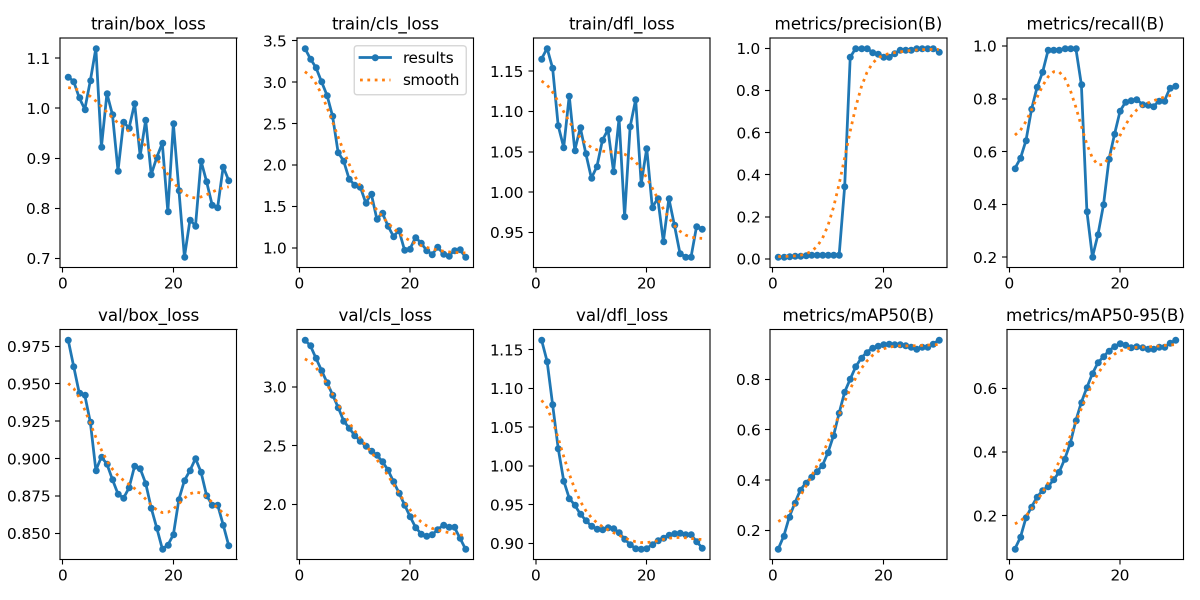

In [ ]:
# 학습 결과를 그래프로 저장한 파일을 통해 확인해 본다
result_img=cv2.imread('/content/runs/detect/train/results.png')
fix_width=1200
height,width=result_img.shape[:2]
ratio=fix_width / width
demension=(fix_width, int(height*ratio))
result_img=cv2.resize(result_img, demension, interpolation=cv2.INTER_AREA)
cv2_imshow(result_img)

# 6.모델 검출

In [ ]:
# 모델 예측
results=model.predict(source='/content/drive/MyDrive/Colab Notebooks/images/03_Dips/test/images/fruit01.jpg', save=True)


image 1/1 /content/drive/MyDrive/Colab Notebooks/images/03_Dips/test/images/fruit01.jpg: 480x640 2 참외s, 207.9ms
Speed: 4.4ms preprocess, 207.9ms inference, 7.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/train2


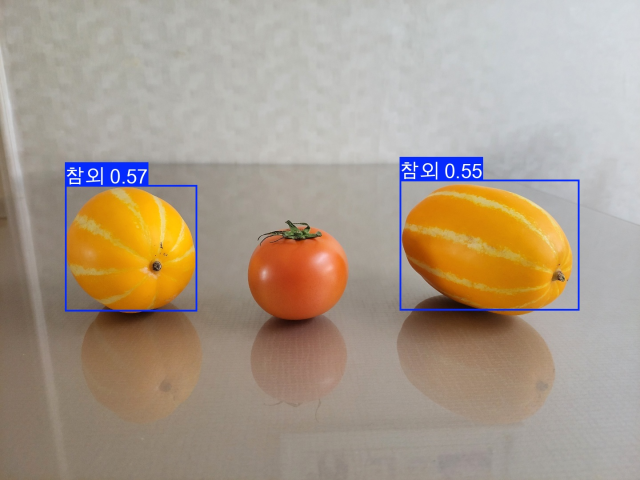

In [ ]:
# 예측 이미지 확인
img=cv2.imread('/content/runs/detect/train2/fruit01.jpg')
fix_width=640
height,width=img.shape[:2]
ratio=fix_width / width
demension=(fix_width, int(height*ratio))
img=cv2.resize(img, demension, interpolation=cv2.INTER_AREA)
cv2_imshow(img)

In [ ]:
results_all=model.predict(source='/content/drive/MyDrive/Colab Notebooks/images/03_Dips/test/images/', save=True)


image 1/20 /content/drive/MyDrive/Colab Notebooks/images/03_Dips/test/images/fruit01.jpg: 480x640 2 참외s, 165.7ms
image 2/20 /content/drive/MyDrive/Colab Notebooks/images/03_Dips/test/images/fruit02.jpg: 480x640 1 참외, 1 토마토, 1 사과, 165.2ms
image 3/20 /content/drive/MyDrive/Colab Notebooks/images/03_Dips/test/images/fruit03.jpg: 480x640 1 참외, 2 사과s, 163.3ms
image 4/20 /content/drive/MyDrive/Colab Notebooks/images/03_Dips/test/images/fruit04.jpg: 480x640 2 참외s, 1 토마토, 3 사과s, 164.2ms
image 5/20 /content/drive/MyDrive/Colab Notebooks/images/03_Dips/test/images/fruit05.jpg: 480x640 1 토마토, 259.3ms
image 6/20 /content/drive/MyDrive/Colab Notebooks/images/03_Dips/test/images/fruit06.jpg: 480x640 (no detections), 193.1ms
image 7/20 /content/drive/MyDrive/Colab Notebooks/images/03_Dips/test/images/fruit07.jpg: 480x640 (no detections), 164.8ms
image 8/20 /content/drive/MyDrive/Colab Notebooks/images/03_Dips/test/images/fruit08.jpg: 480x640 (no detections), 157.4ms
image 9/20 /content/drive/MyDrive

# 7.학습된 모델 가중치

In [ ]:
f_model=YOLO('/content/runs/detect/train3/weights/best.pt')

In [ ]:
# 모델이 분류할 수 있는 부류의 수 확인
print(type(f_model.names), len(f_model.names))

# 모델이 분류할 수 있는 부류 확인
print(f_model.names)

<class 'dict'> 3
{0: '참외', 1: '토마토', 2: '사과'}


In [ ]:
import shutil
import os

# 복사할 원본 폴더
src='/content/runs/detect/train3'

# 복사 대상 경로
dst='/content/drive/MyDrive/Colab Notebooks/images/03_Disp_Reslut'

if os.path.exists(dst):
    print("폴더가 존재합니다.")
else:
    print("폴더가 존재하지 않습니다.")

# 폴더 전체 복사
shutil.copytree(src, dst, dirs_exist_ok=True)   # 덮어쓰기 허용

폴더가 존재합니다.


'/content/drive/MyDrive/Colab Notebooks/images/03_Disp_Reslut'

In [ ]:
new_model=YOLO('/content/drive/MyDrive/Colab Notebooks/images/03_Disp_Reslut/weights/best.pt')
print(type(new_model.names), len(new_model.names))

# 모델이 분류할 수 있는 부류 확인
print(model.names)

<class 'dict'> 3
{0: '참외', 1: '토마토', 2: '사과'}


In [ ]:
new_model=model.predict(source='/content/drive/MyDrive/Colab Notebooks/images/03_Dips/test/images/fruit01.jpg', save=True)


image 1/1 /content/drive/MyDrive/Colab Notebooks/images/03_Dips/test/images/fruit01.jpg: 480x640 2 참외s, 1 토마토, 8.0ms
Speed: 3.3ms preprocess, 8.0ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/train34


- https://universe.roboflow.com/
- 검색어 : emotion, face, expression